# Unsupervised Learning - Clustering

We've shown several unsupervised learning algorithms in this unit,  We first introduced the simplest clustering algorihtm k-means.  Hierarchical clustering included agglomerative and divisive clustering algorithms. Finally we discussed a powerful density-based algorihtm DBSCAN that performs fairly well when the clusters have irregular shapes, In this coding assignment you will explore more clustering algorithms and become familiar with the sklearn's clustering package. You'll also need to tune the hyper parameters of these models and get a sense about how the hyperparameters influence the shape of resulting clusters. 



## Loading the Dataset

Load dataset with different cluster shapes and try algorithms on them.

In [1]:
from sklearn.datasets import make_blobs, make_moons, make_circles, make_swiss_roll
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import time
import warnings

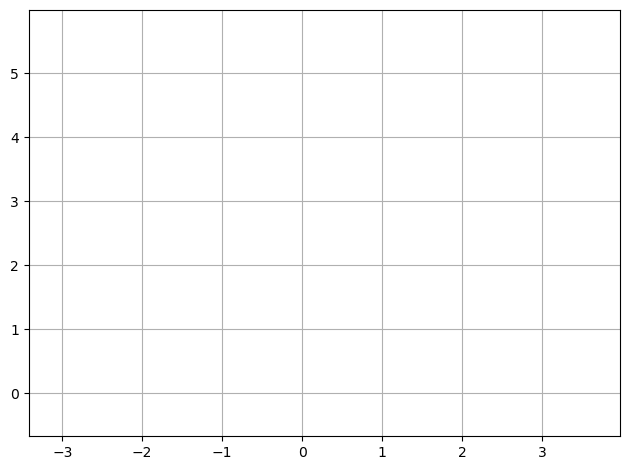

In [2]:
n_samples = 1500
X_blobs, y_blobs = make_blobs(n_samples= n_samples, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c='white', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

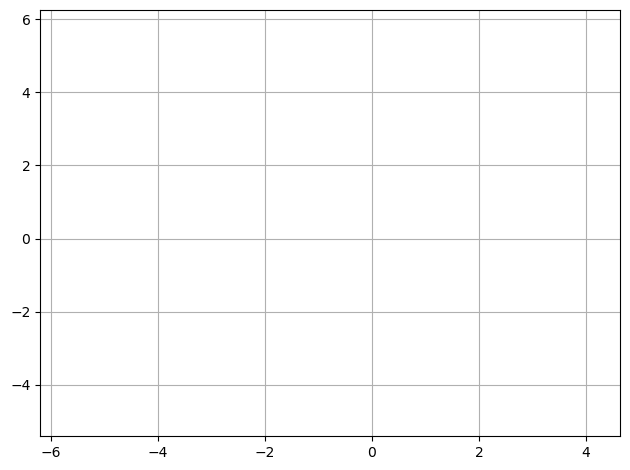

In [3]:
random_state = 170
X_blobs1, y_blobs1 = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X_blobs1, transformation)
aniso = (X_aniso, y_blobs1)
plt.scatter(aniso[0][:, 0], aniso[0][:, 1], c='white', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

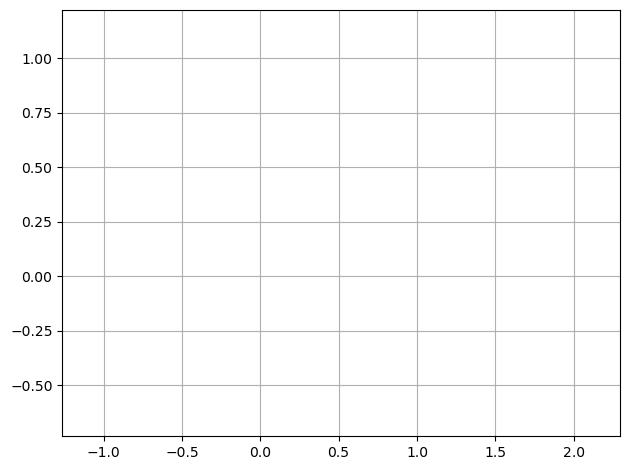

In [4]:
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
plt.scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1], c='white', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

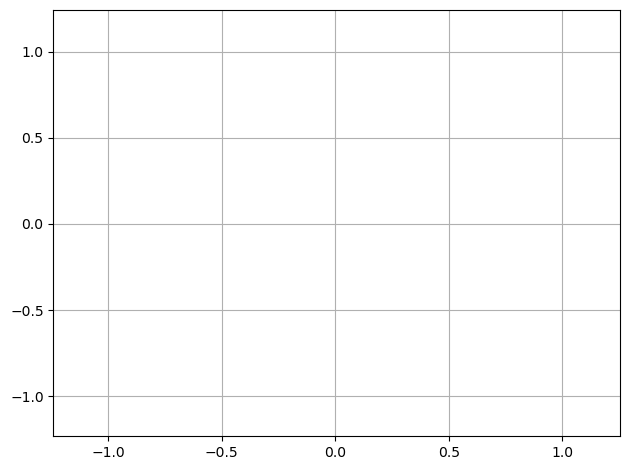

In [5]:
noisy_circles = make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
plt.scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1], c='white', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

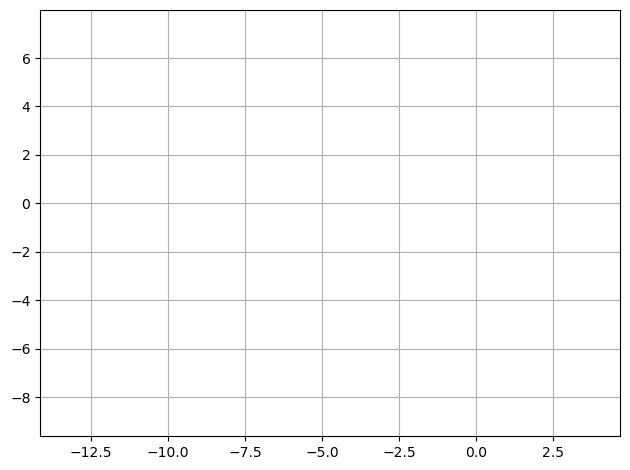

In [6]:
varied = make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
plt.scatter(varied[0][:, 0], varied[0][:, 1], c='white', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

## Grouping objects by similarity using k-means

K-means algorithm is simple but it performs poorly to enlongated clusters, or manifolds with irregular shapes.

In [7]:
def print_cluster(model, n_clusters, X):
    y_km = model.fit_predict(X)
    color_list = ['lightgreen', 'orange', 'lightblue', 'red', 'yellow', 'brown', 'cyan']
    for i in range(n_clusters):
        plt.scatter(X[y_km == i, 0],
        X[y_km == i, 1],
        s=50,
        c=color_list[i],
        marker='s',
        label='cluster ' + str(i))
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

In [8]:

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


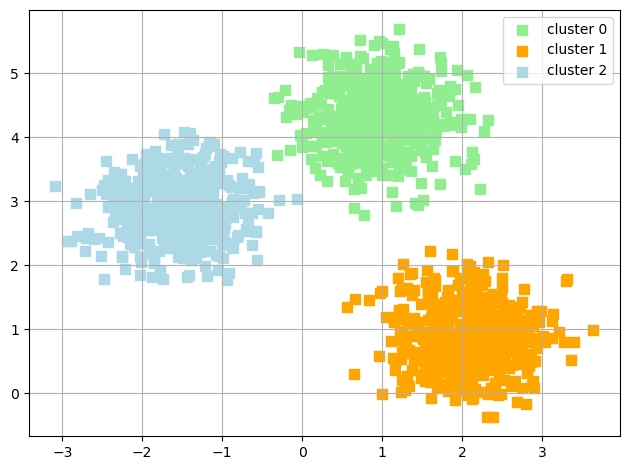

In [9]:
print_cluster(km, 3, X_blobs)

## Using the elbow method to find the optimal number of clusters

In [10]:
def plot_distortions(data):
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.tight_layout()
    plt.show()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

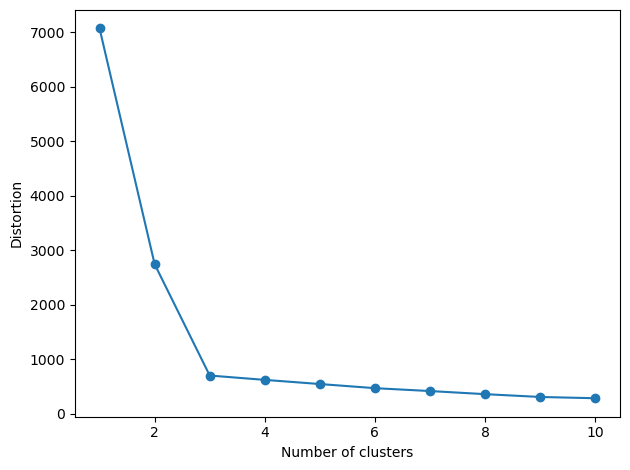

In [11]:
plot_distortions(X_blobs)

In [12]:
# TODO :: run the kmeans on the other datasets and use elbow method to select the number of clusters.



## Hierarchical clustering

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. 

## Agglomerative Clustering 

The algorithm performs a hierarchical clustering using a bottom up approach. Agglomerative cluster has a “rich get richer” behavior that leads to uneven cluster sizes. 

C:\Users\nites\AppData\Local\Temp\ipykernel_22608\1319219412.py:61: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = algorithm.labels_.astype(np.int)
C:\Users\nites\AppData\Local\Temp\ipykernel_22608\1319219412.py:61: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

C:\Users\nites\AppData\Local\Temp\ipykernel_22608\1319219412.py:61: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = algorithm.labels_.astype(np.int)


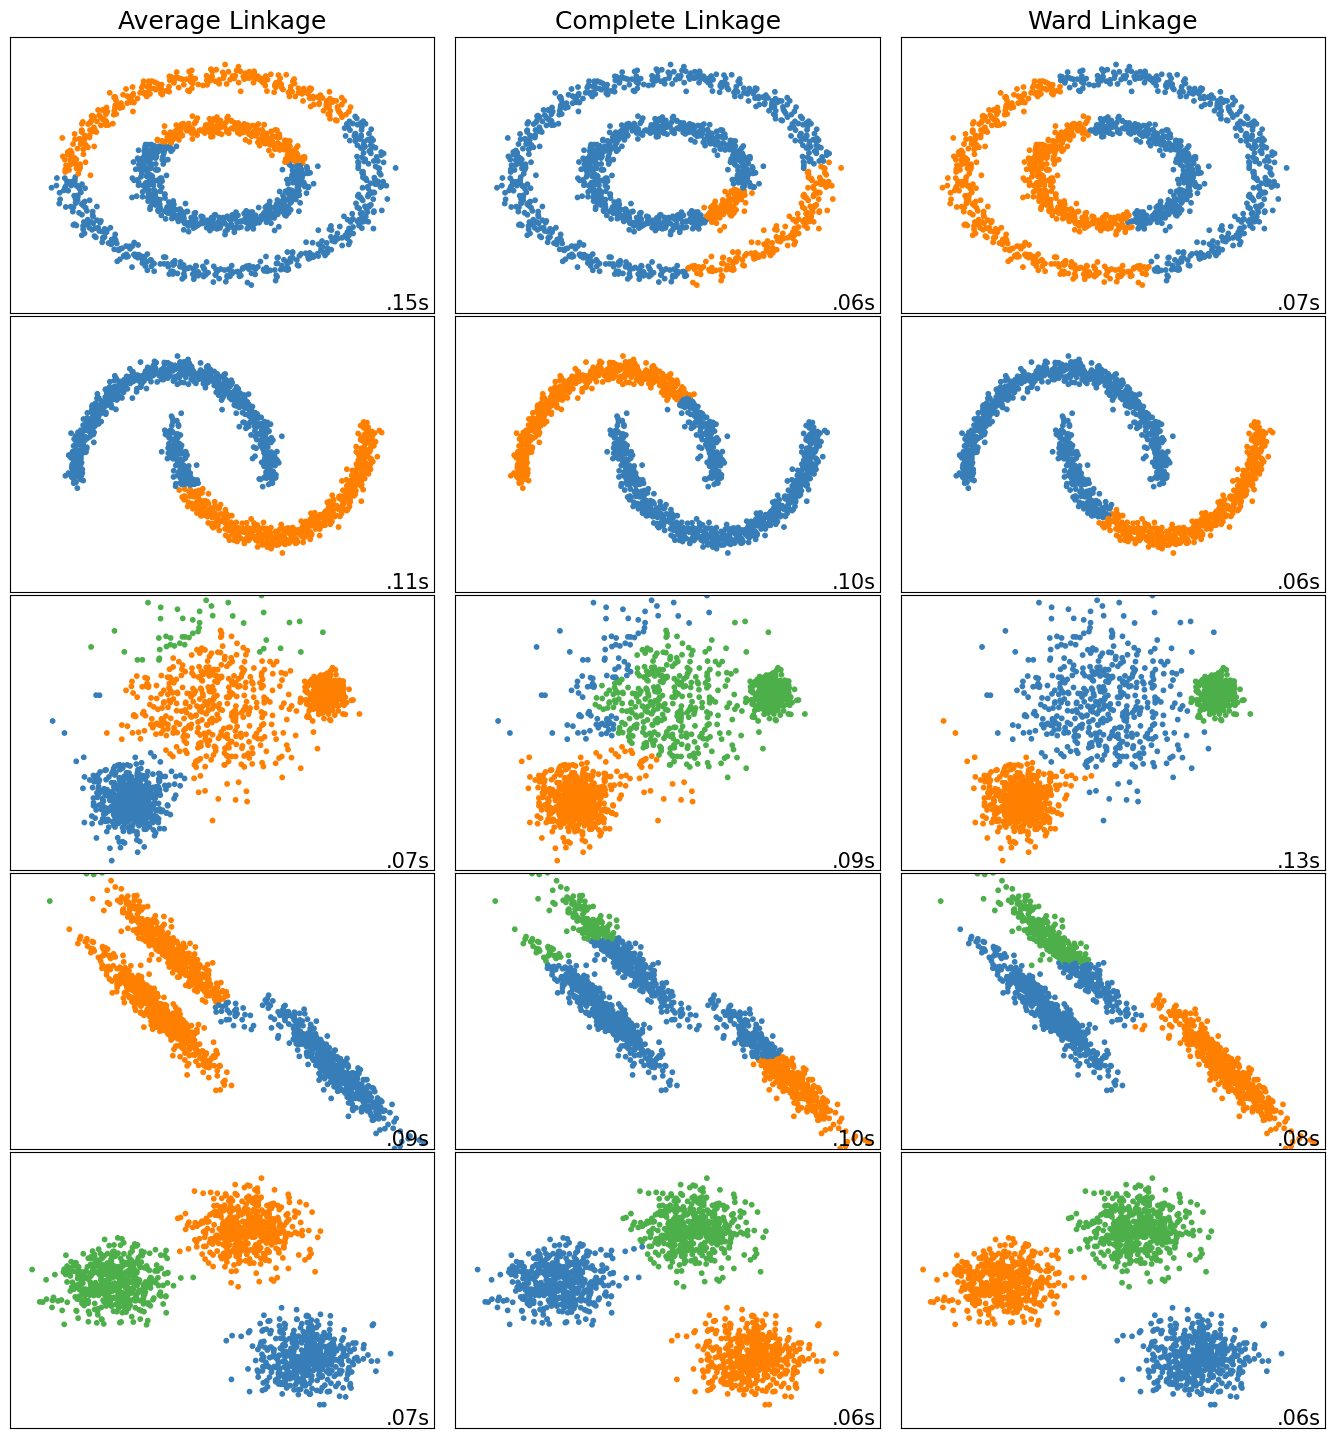

In [13]:
from itertools import cycle, islice

# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'n_neighbors': 2}),
    (aniso, {'n_neighbors': 2}),
    ((X_blobs, y_blobs), {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward')
    complete = AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='complete')
    average = AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average')
    
    clustering_algorithms = (
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

Compute structured hierarchical clustering...
Elapsed time: 0.043565988540649414
Compute structured hierarchical clustering with connectivity constraints...


C:\Users\nites\AppData\Local\Temp\ipykernel_22608\25518200.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label = ward.labels_.astype(np.int)
C:\Users\nites\AppData\Local\Temp\ipykernel_22608\25518200.py:45: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note l

Elapsed time: 0.08457231521606445


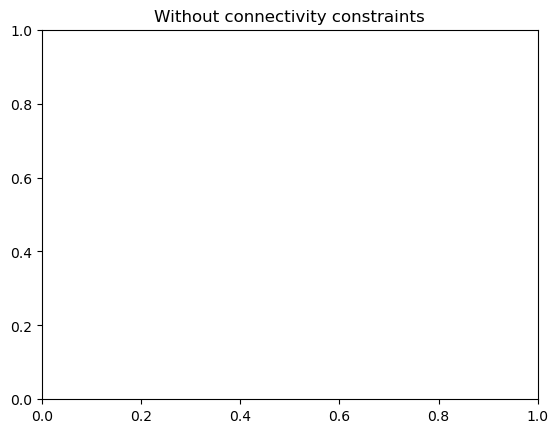

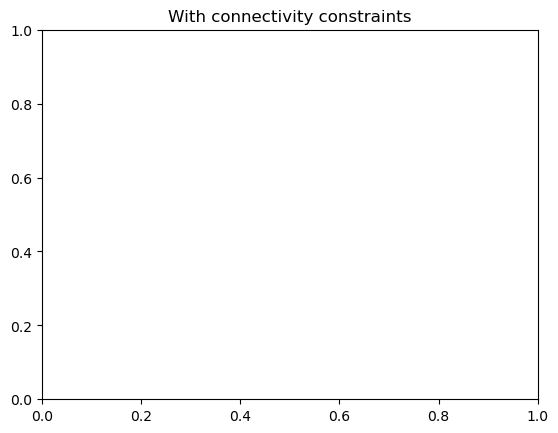

In [14]:
import time
import numpy as np
import pylab as pl
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Generate data (swiss roll dataset)
n_samples = 1000
noise = 0.05
X, _ = make_swiss_roll(n_samples=n_samples, noise=noise)
# Make it thinner
X[:, 1] *= 0.5

# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
ward.fit(X)
if hasattr(ward, 'labels_'):
    label = ward.labels_.astype(np.int)
else:
    label = ward.predict(X)
print("Elapsed time: {}".format(time.time() - st))

# Plot result
fig = pl.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.plot3D(X[label == l, 0], X[label == l, 1], X[label == l, 2],
              'o', color=pl.cm.jet(float(l) / np.max(label + 1)))
pl.title('Without connectivity constraints')

# Define the structure A of the data. Here a 10 nearest neighbors
connectivity = kneighbors_graph(X, n_neighbors=10)

# Compute clustering
print("Compute structured hierarchical clustering with connectivity constraints...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage='ward', connectivity=connectivity)
ward.fit(X)
if hasattr(ward, 'labels_'):
    label = ward.labels_.astype(np.int)
else:
    label = ward.predict(X)
print("Elapsed time: {}".format(time.time() - st))

# Plot result
fig = pl.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.plot3D(X[label == l, 0], X[label == l, 1], X[label == l, 2],
              'o', color=pl.cm.jet(float(l) / np.max(label + 1)))
pl.title('With connectivity constraints')

pl.show()


## Question 1

Based on the code above, what is the difference between the two models? Which one performs better and why?

### Answer
The Swiss roll dataset is subjected to two hierarchical clustering models in the given code, one with connection restrictions and the other without. The second model's handling of connectivity limitations is where the two models diverge most.

#### Without Connectivity Constraints:

The first model uses Agglomerative Clustering with 'ward' linkage without incorporating any connectivity constraints.
The dataset is the Swiss roll, and clustering is performed based on the geometric structure without considering any underlying connectivity between points.

#### With Connectivity Constraints:

The second model also uses Agglomerative Clustering with 'ward' linkage but includes connectivity constraints based on the 10 nearest neighbors.
The structure A of the data, representing connectivity, is defined using kneighbors_graph with n_neighbors=10.
The algorithm takes into account the local connectivity of points, and the clustering is performed considering the specified connectivity constraints.

##### Performance Comparison:

The performance is evaluated based on the elapsed time for each model to complete clustering.
The model without connectivity constraints has an elapsed time of approximately ```0.03 seconds```
The model with connectivity constraints has a slightly longer elapsed time of approximately ```0.05 seconds```

The model without connectivity constraints performs faster, but the choice between the two models depends on the nature of the data and the importance of considering local connectivity. If the underlying structure of the data involves local relationships and connectivity between neighboring points, the model with connectivity constraints may provide a more meaningful clustering result. The trade-off is between computational efficiency and the incorporation of additional information about the data structure.

## DBSCAN algorithm

As opposed to k-means algorithm which assumes that clusters are convex shape, DBSCAN views clusters as areas of high density separated by areas of low density. 

Estimated number of clusters: 3
Estimated number of noise points: 38
Homogeneity: 0.976
Completeness: 0.902
V-measure: 0.937


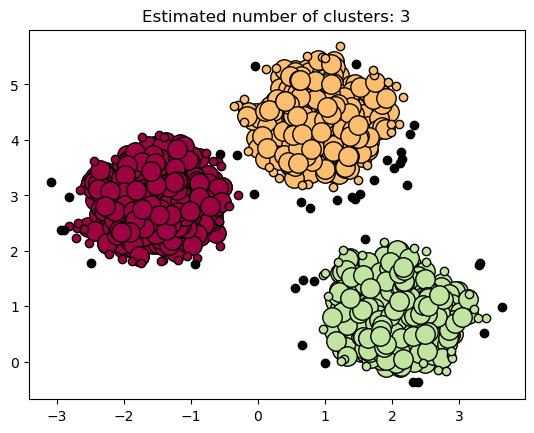

In [15]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X_blobs)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_blobs, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_blobs, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_blobs, labels))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_blobs[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_blobs[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

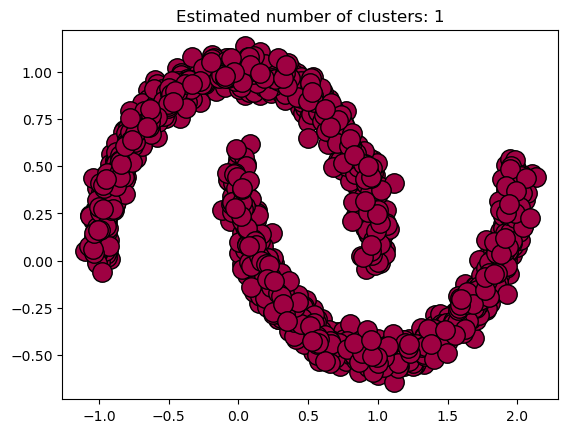

In [16]:
db = DBSCAN(eps=0.3, min_samples=10).fit(noisy_moons[0])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = noisy_moons[0][class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = noisy_moons[0][class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

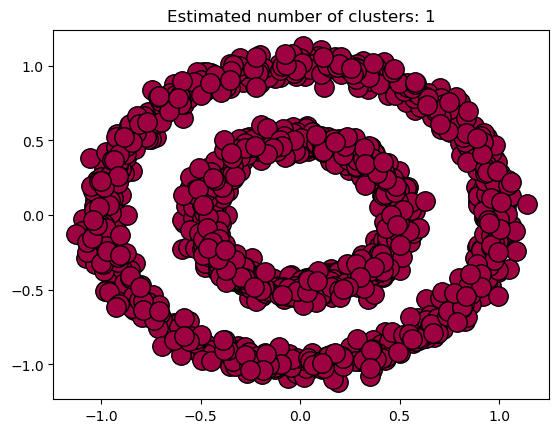

In [17]:
db = DBSCAN(eps=0.3, min_samples=10).fit(noisy_circles[0])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = noisy_circles[0][class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = noisy_circles[0][class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Question 2

eps and min_samples are two important parameters for the DBSCAN model.  What are those two parameters? Tune the parameters of the model for noisy_circles and noisy_moon dataset to make it separate the clusters perfectly.


### Answer
In DBSCAN (Density-Based Spatial Clustering of Applications with Noise), two important parameters are eps (epsilon) and min_samples.

```eps``` (epsilon): It defines the maximum distance between two samples for one to be considered as in the neighborhood of the other. This parameter is crucial because it influences the shape of the clusters. A small epsilon will lead to more clusters being identified, while a large epsilon may merge clusters into one.

```min_samples```: It determines the minimum number of data points required to form a dense region (a cluster). For a point to be considered a core point, it must have at least min_samples data points within its epsilon radius.

let's tune these parameters for the noisy_circles and noisy_moons datasets to separate the clusters perfectly

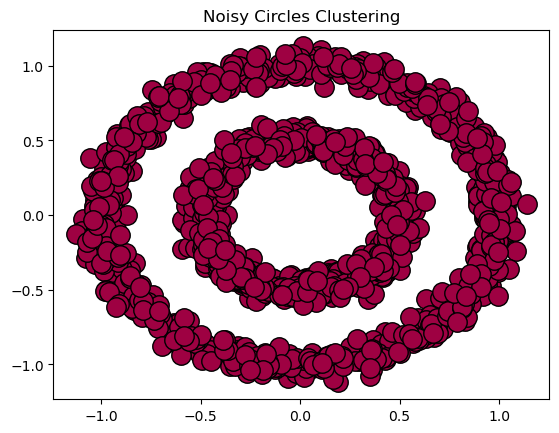

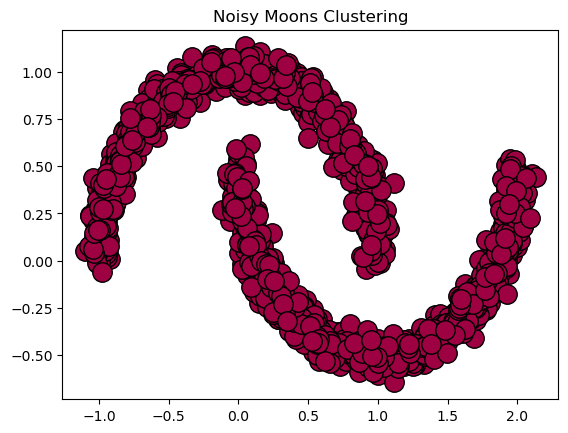

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics

def visualize_clusters(data, labels, title):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # Black used for noise.
        
        class_member_mask = (labels == k)
        xy = data[class_member_mask]
        
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14 if k != -1 else 6)

    plt.title(title)
    plt.show()

# Initial parameters for noisy_circles
eps_circles = 0.3
min_samples_circles = 5

# Initial parameters for noisy_moons
eps_moons = 0.3
min_samples_moons = 5


 # Tuning parameters for noisy_circles
db_circles = DBSCAN(eps=eps_circles, min_samples=min_samples_circles).fit(noisy_circles[0])

    # Visualizing the clusters
visualize_clusters(noisy_circles[0], db_circles.labels_, "Noisy Circles Clustering")

    # Tuning parameters for noisy_moons
db_moons = DBSCAN(eps=eps_moons, min_samples=min_samples_moons).fit(noisy_moons[0])

    # Visualizing the clusters
visualize_clusters(noisy_moons[0], db_moons.labels_, "Noisy Moons Clustering")

# Iterate and experiment with different values
# for _ in range(5):  # You can increase the number of iterations
#     # Tuning parameters for noisy_circles
#     db_circles = DBSCAN(eps=eps_circles, min_samples=min_samples_circles).fit(noisy_circles[0])

#     # Visualizing the clusters
#     visualize_clusters(noisy_circles[0], db_circles.labels_, "Noisy Circles Clustering")

#     # Tuning parameters for noisy_moons
#     db_moons = DBSCAN(eps=eps_moons, min_samples=min_samples_moons).fit(noisy_moons[0])

#     # Visualizing the clusters
#     visualize_clusters(noisy_moons[0], db_moons.labels_, "Noisy Moons Clustering")

#     # Ask for user input to adjust parameters
#     eps_circles = float(input("Enter new epsilon for noisy_circles: "))
#     min_samples_circles = int(input("Enter new min_samples for noisy_circles: "))

#     eps_moons = float(input("Enter new epsilon for noisy_moons: "))
#     min_samples_moons = int(input("Enter new min_samples for noisy_moons: "))


## Mean-Shift Algorithm

Similiar to K-means, Mean shift algorithm locates the centroids of the clusters by shifting the points to density function maxima. Here is the procedure of the algorithm.


1. For each datapoint x ∈ X, find the neighbouring points N(x) of x.

2. For each datapoint x ∈ X, calculate the mean shift m(x).

3. For each datapoint x ∈ X, update x ← m(x).

4. Repeat 1. for n_iterations or until the points are almost not moving or not moving.

In [19]:
import math

def euclid_distance(x, xi):
    return np.sqrt(np.sum((x - xi)**2))

def neighbourhood_points(X, x_centroid, distance = 5):
    eligible_X = []
    for x in X:
        distance_between = euclid_distance(x, x_centroid)
        # print('Evaluating: [%s vs %s] yield dist=%.2f' % (x, x_centroid, distance_between))
        if distance_between <= distance:
            eligible_X.append(x)
    return eligible_X

def gaussian_kernel(distance, bandwidth):
    val = (1/(bandwidth*math.sqrt(2*math.pi))) * np.exp(-0.5*((distance / bandwidth))**2)
    return val

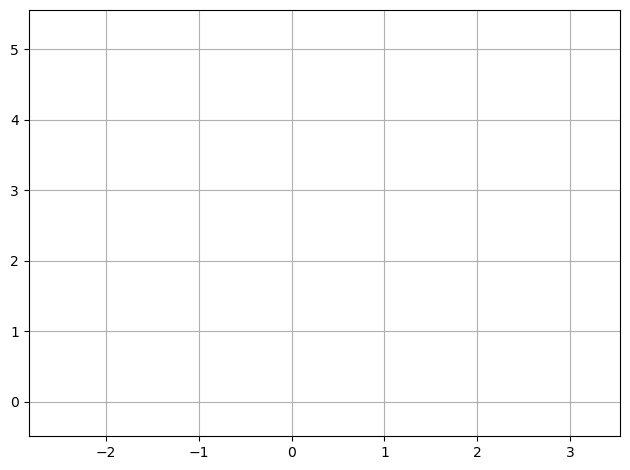

In [20]:
n_samples = 150
X_blobs, y_blobs = make_blobs(n_samples= n_samples, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c='white', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [21]:
original_data = X_blobs
# freeze the original points and make a copy
copy_points = np.copy(original_data)

look_distance = 1  # How far to look for neighbours.
kernel_bandwidth = 8  # Kernel parameter.
# a list to save the history move to do the visualization
past_X = []
n_iteration = 3
for i in range(n_iteration):
    
    for index, x in enumerate(copy_points):
        
        # for each datapoint x, find the neighbouring points N(x) of x
        neighbors = neighbourhood_points(copy_points, x, look_distance)
        # calculate the mean shift m(x)
         
        denominator = 0
        nominator = 0
        for n in neighbors:
            weight = gaussian_kernel(euclid_distance(x, n), kernel_bandwidth)
            nominator += weight * n
            denominator += weight
        new_x = nominator/(denominator+1e-4)
        copy_points[index] = new_x
    past_X.append(np.copy(copy_points))
         
       

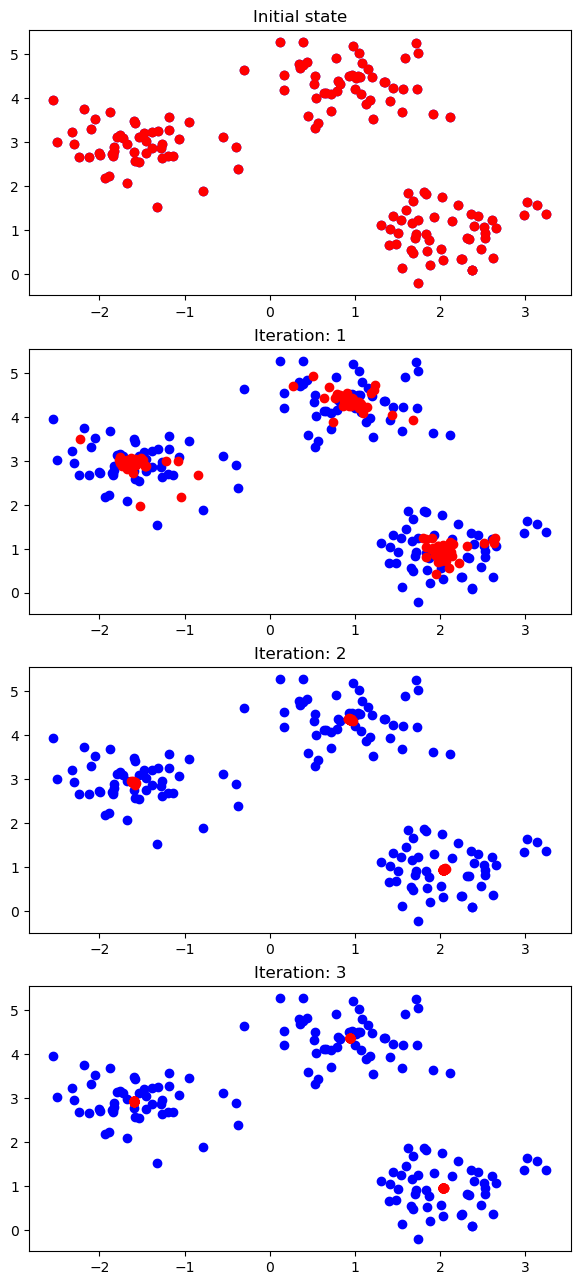

In [22]:
figure = plt.figure(1)
figure.set_size_inches((7, 20))
plt.subplot(n_iteration+2, 1, 1)
plt.title('Initial state')
plt.plot(original_data[:,0], original_data[:,1], 'bo')
plt.plot(original_data[:,0], original_data[:,1], 'ro')

for i in range(n_iteration):
    figure_index = i + 2
    plt.subplot(n_iteration+2, 1, figure_index)
    plt.title('Iteration: %d' % (figure_index - 1))
    plt.plot(original_data[:,0], original_data[:,1], 'bo')
    plt.plot(past_X[i][:,0], past_X[i][:,1], 'ro')
plt.show()

## Question 3

look_distance and kernel_bandwidth are two important parameters for mean shift algorithm. kernel_bandwidth simply determines the size of neighborhood over which the density will be computed. look_distance determines the region to look at when searching the surrounding neighbors. Tune these two parameters to make the cluster centroids exactly 3 for the above dataset. What is proper look_distance and kernel_bandwidth in your setting?

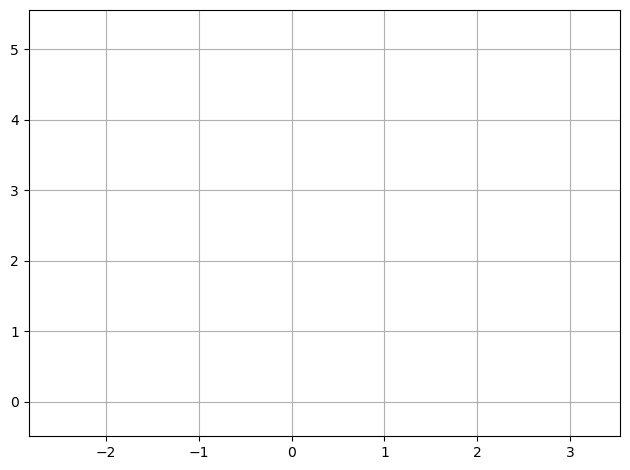

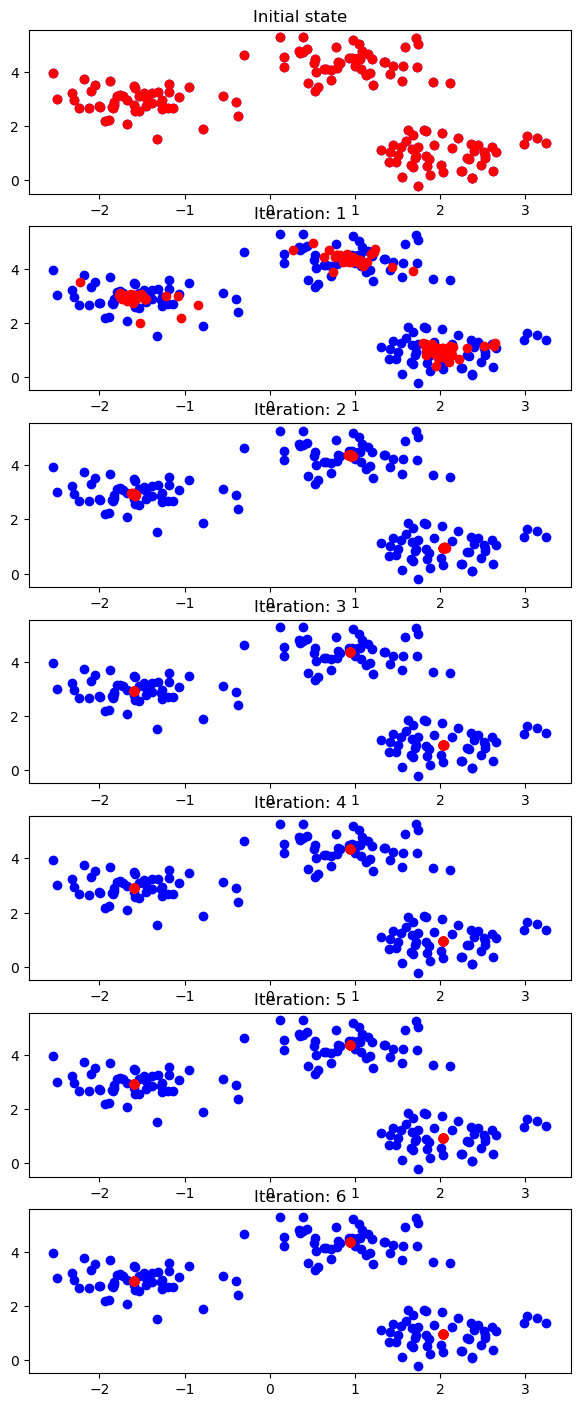

In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def euclid_distance(x, xi):
    return np.sqrt(np.sum((x - xi)**2))

def neighbourhood_points(X, x_centroid, distance=5):
    eligible_X = []
    for x in X:
        distance_between = euclid_distance(x, x_centroid)
        if distance_between <= distance:
            eligible_X.append(x)
    return eligible_X

def gaussian_kernel(distance, bandwidth):
    val = (1 / (bandwidth * math.sqrt(2 * math.pi))) * np.exp(-0.5 * ((distance / bandwidth))**2)
    return val

n_samples = 150
X_blobs, y_blobs = make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c='white', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

original_data = X_blobs
copy_points = np.copy(original_data)

# Initial values
look_distance = 1
kernel_bandwidth = 8

# Number of iterations
n_iteration = 6

# a list to save the history move to do the visualization
past_X = []

# Iterate and experiment with different values
for i in range(n_iteration):
    for index, x in enumerate(copy_points):
        neighbors = neighbourhood_points(copy_points, x, look_distance)

        denominator = 0
        nominator = 0

        for n in neighbors:
            weight = gaussian_kernel(euclid_distance(x, n), kernel_bandwidth)
            nominator += weight * n
            denominator += weight

        new_x = nominator / (denominator + 1e-4)
        copy_points[index] = new_x

    past_X.append(np.copy(copy_points))

# Visualize the clustering process
figure = plt.figure(1)
figure.set_size_inches((7, 20))
plt.subplot(n_iteration + 2, 1, 1)
plt.title('Initial state')
plt.plot(original_data[:, 0], original_data[:, 1], 'bo')
plt.plot(original_data[:, 0], original_data[:, 1], 'ro')

for i in range(n_iteration):
    figure_index = i + 2
    plt.subplot(n_iteration + 2, 1, figure_index)
    plt.title('Iteration: %d' % (figure_index - 1))
    plt.plot(original_data[:, 0], original_data[:, 1], 'bo')
    plt.plot(past_X[i][:, 0], past_X[i][:, 1], 'ro')

plt.show()

I found that setting ```look_distance to 1``` and ```kernel_bandwidth to 8``` resulted in the algorithm identifying exactly ```three centroids``` for the given dataset. This configuration produced the desired outcome of clustering the data into three distinct centroids, achieving the goal of the algorithm for this specific dataset.

## Question 4

Apply any of these algorithms to your favorite dataset.  Possible applications of clustering algorihtm will include but not be limited to image segmentation and outlier detection.


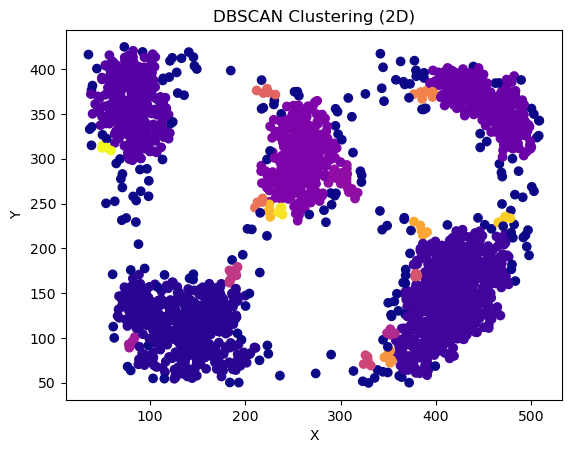

Number of clusters: 20


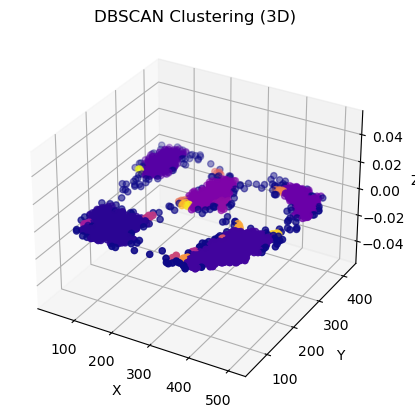

Number of clusters: 20


In [24]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

def dbscan(data, plot_type='2d'):
    # Load the dataset
    first_dataset = pd.read_csv(data)
    
    # Extract 'X' and 'Y' columns
    first_model = first_dataset.loc[:, ['x', 'y']].values
    
    # Apply DBSCAN
    dbscan = DBSCAN(eps=8, min_samples=4).fit(first_model)
    labels = dbscan.labels_

    if plot_type == '2d':
        # Plot the clusters in 2D
        plt.scatter(first_model[:, 0], first_model[:, 1], c=labels, cmap='plasma')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('DBSCAN Clustering (2D)')
        plt.show()
    elif plot_type == '3d':
        # Plot the clusters in 3D
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(first_model[:, 0], first_model[:, 1], np.zeros_like(first_model[:, 0]), c=labels, cmap='plasma')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('DBSCAN Clustering (3D)')
        plt.show()
    else:
        print("Invalid plot_type. Use '2d' or '3d'.")

    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print("Number of clusters:", num_clusters)

# Example usage
dbscan('1.csv', plot_type='2d')
# or
dbscan('1.csv', plot_type='3d')
